<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;"><font size=4 color=blue><b>[8차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>○ 에지 추출 방법에 대해 학습한다.<br><br>
○ 이미지 필터링 방법에 대해 학습한다.
</font></td></tr>   
</table>        

# 에지 개념 및 종류

## 에지 개념

- 에지 (Edge) : 이미지에서 픽셀값 (밝기)가 급격하게 변하는 부분 - 경계선, 윤곽선 (Contour)

<img src="./lecture_image/08_edge01.png" width=60%>


- 에지 검출 방법
  - 1차 미분 : Sobel 에지 추출기, Prewitt 에지 추출기, Robert 에지 추출기
  - 2차 미분 : 라플라시안 에지 추출기, LoG, DoG
  - Canny 에지 추출기
  - Line 에지 추출기


- 에지의 용도 : 물체의 모양, 위치, 크기 등에 대한 정보

## Sobel 에지 추출기

- 에지 추출의 가장 대표적인 1차 미분 연산자 중 하나
- 모든 방향의 에지를 추출
- 잡음에 대체적으로 강하지만 대각선 방향의 에지에 더 민감하게 반응
- 소벨 마스크의 모양

<img src="./lecture_image/08_edge02.png" width=40%>

- <font color=red>cv2.Sobel(src, depth, dx, dy, ksize)</font>
    - depth : 출력 이미지의 데이터 타입 (-1 이면 입력과 동일), 출력 이미지의 정밀도
    - dx : x 방향 미분 차수
    - dy : y 방향 미분 차수
    - ksize : 커널 크기 (홀수 값을 사용하며, 최대 31까지 설정)
    
    
- <font color=red>result = cv2.addWeighted(x, a, y, b, c)</font>   
  - 두 이미지를 각각 가중치를 주어 합침
  - 가중치의 값이 큰 이미지가 좀더 선명하게 나타남 
  - result = x * a + y * b + c

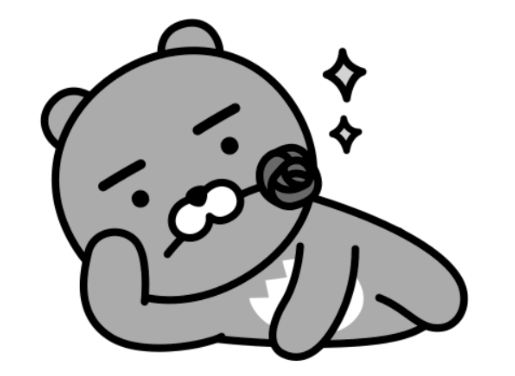

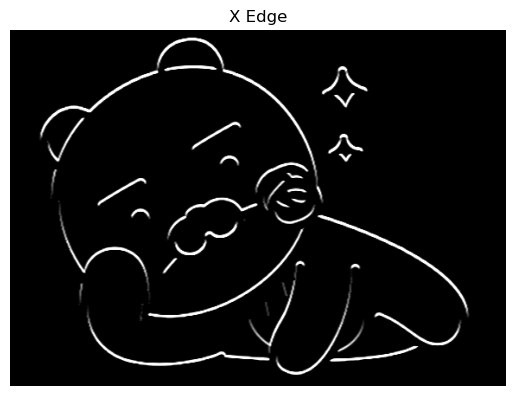

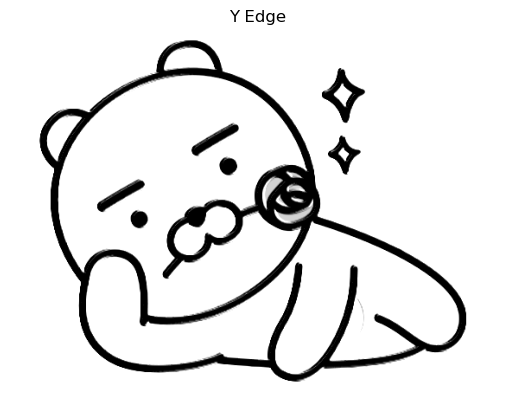

In [6]:
#실습
import cv2 
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/che.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap ="gray")
plt.axis("off")
plt.show()
# sobel 필터 설정
sobel_x = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
sobel_y = np.array([[1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

# 예지 계산
# convertScaleAbs() : 음수를 양수로 변환(Abs), 255보다 커지는 문제 (Scale)
edge_x = cv2.convertScaleAbs(cv2.filter2D(img, -1, sobel_x))
edge_y = cv2.convertScaleAbs(cv2.filter2D(img, -1, sobel_y))

plt.imshow(edge_x, cmap="gray")
plt.title("X Edge")
plt.axis("off")
plt.show()
plt.imshow(edge_y, cmap="gray")
plt.title("Y Edge")
plt.axis("off")
plt.show()

## Canny 에지 추출기

- <font color=red>cv2.Canny(src, minVal, maxVal)</font>   
  - minVal : 인접한 에지와 연결 여부를 판단하는 임계값 - 작으면 에지와 에지를 더 많이 연결
  - maxVal : 에지 여부 판단하는 임계값 - 작으면 에지가 더 많이 검출
  
  
- Canny 연산자는 픽셀의 변화분이 maxVal이상이면 에지 (강한 에지)로 
- 사이값이면 연결성으로 에지로 판단 (약한 에지)하고 
- 픽셀의 변화분이 minVal 이하이면 에지가 아니라고 판단 

In [2]:
#실습

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다른 에지 검출기를 사용하여 에지 구하기<br><img src="./lecture_image/08_edge04.png" width=30%></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/08_edge03.png" width=60%></td></tr>   
</table>

## 이미지 선명도 분석

### Laplacian 필터 이용

- <font color=red>Laplacian(src, depth)</font>
  - src : 입력 영상
  - ddepth : 출력영상 데이터 타입, -1이면 입력 영상과 같은 데이터 타입 사용.
  
- 필터의 형태

<img src="./lecture_image/08_edge05.png" width=60%>

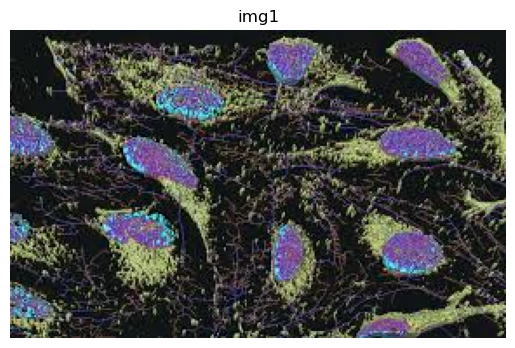

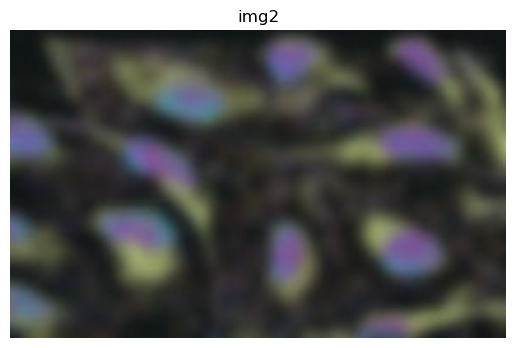

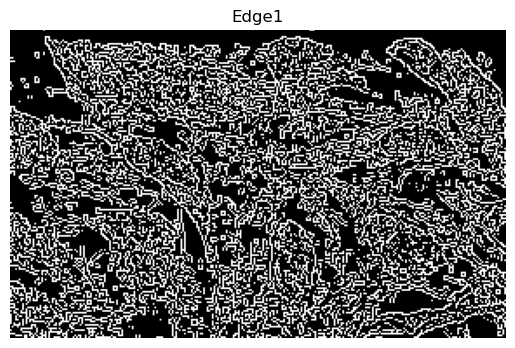

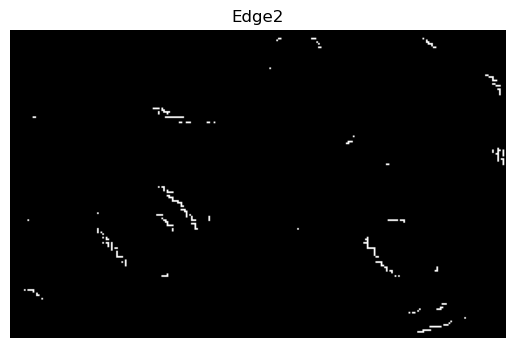

img1의 선명도 : 75.7897710377639
img2의 선명도 : 1.5468331846565566


In [14]:
#실습
import cv2 
import matplotlib.pyplot as plt
import numpy as np

img1 = cv2.imread("images/cell1.jpg")
img_gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread("images/cell2.jpg")
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.imshow(img1)
plt.title("img1")
plt.axis("off")
plt.show()

plt.imshow(img2)
plt.title("img2")
plt.axis("off")
plt.show()

edge1 = cv2.Canny(img_gray1, 100, 100)
edge2 = cv2.Canny(img_gray2, 100, 100)

plt.imshow(edge1, cmap="gray")
plt.title("Edge1")
plt.axis("off")
plt.show()

plt.imshow(edge2, cmap="gray")
plt.title("Edge2")
plt.axis("off")
plt.show()

# 선명도
print(f"img1의 선명도 : {np.average(edge1)}")
print(f"img2의 선명도 : {np.average(edge2)}")

### 다른 선명도 계산법

In [4]:
#실습

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 소벨 에지 검출기를 사용하여 선명도 구하기</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/08_edge06.png" width=70%></td></tr>   
</table>

# 이미지 필터

## motion blur 
  - 특정한 방향으로 움직이는 형상을 표현
<img src="./lecture_image/08_blur.png" width=20%>

In [5]:
#실습

In [6]:
#실습

## 엠보싱(embossing) 필터

  - 블록 뛰어나오는 듯한 느낌을 주는 효과
<img src="./lecture_image/08_embossing.png" width=20%>

In [7]:
#실습

In [8]:
#실습

## 샤프닝 (sharpnin) 필터
  
  - 이미지의 에지 성분을 날카롭게 하는 효과

<img src="./lecture_image/08_sharpning.png" width=20%>

In [9]:
#실습

## 감마(Gamma) 보정
  - 이미지가 너무 어둡거나 밝은 경우, 픽셀 값의 변화를 통해 밝기를 보정하는 작업
  - gamma > 1 : 어두운 영역의 변화폭은 크고 밝은 영역의 변화폭은 작음 → 어두웠던 영역만 잘 보이게 됨

  - 반대로 gamma < 1 : 밝은 영역의 변화폭이 크고 어두운 영역의 변화폭은 작음 → 밝은 영역만 잘 보이게 됨. 
  <img src="./lecture_image/08_gamma_eq.png" width=40%>
  <img src="./lecture_image/08_gamma.png" width=40%>

In [10]:
#실습

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[8차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ 에지 (Edge) : 이미지에서 픽셀값 (밝기)가 급격하게 변하는 부분
        
○ 에지 검출 방법
  - 1차 미분 : Sobel 에지 추출기, Prewitt 에지 추출기, Robert 에지 추출기
  - 2차 미분 : 라플라시안 에지 추출기, LoG, DoG
  - Canny 에지 추출기
  - Line 에지 추출기
○ 에지의 용도 : 물체의 모양, 위치, 크기 등에 대한 정보


○ 이미지 필터
  - motion blur : 특정한 방향으로 움직이는 형상을 표현
  - 엠보싱(embossing) 필터 : 블록 뛰어나오는 듯한 느낌을 주는 효과
  - 샤프닝 (sharpnin) 필터 : 이미지의 에지 성분을 날카롭게 하는 효과

○ 감마(Gamma) 보정 : 이미지가 너무 어둡거나 밝은 경우, 픽셀 값의 변화를 통해 밝기를 보정하는 작업
  - gamma > 1 : 어두운 영역의 변화폭은 크고 밝은 영역의 변화폭은 작음 → 어두웠던 영역만 잘 보이게 됨
  - gamma < 1 : 밝은 영역의 변화폭이 크고 어두운 영역의 변화폭은 작음 → 밝은 영역만 잘 보이게 됨.      
        
        
</font></td></tr>   
</table>
